1.  For a given set of growth rates try various (non-zero) initial daisy
    populations.

2.  For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.

3.  Can you determine when non-zero steady states are achieved? Explain.

In [4]:
file_list = ['fixed_growth.yaml','fixed_growth2.yaml','fixed_growth3.yaml','fixed_growth4.yaml']
print(file_list[])

fixed_growth.yaml


whiteconc
0.2
blackconc
0.7
fixed_growth.yaml
whiteconc
0.2
blackconc
0.7
whiteconc
0.75
blackconc
0.25
whiteconc
0.5
blackconc
0.5
whiteconc
0.25
blackconc
0.75


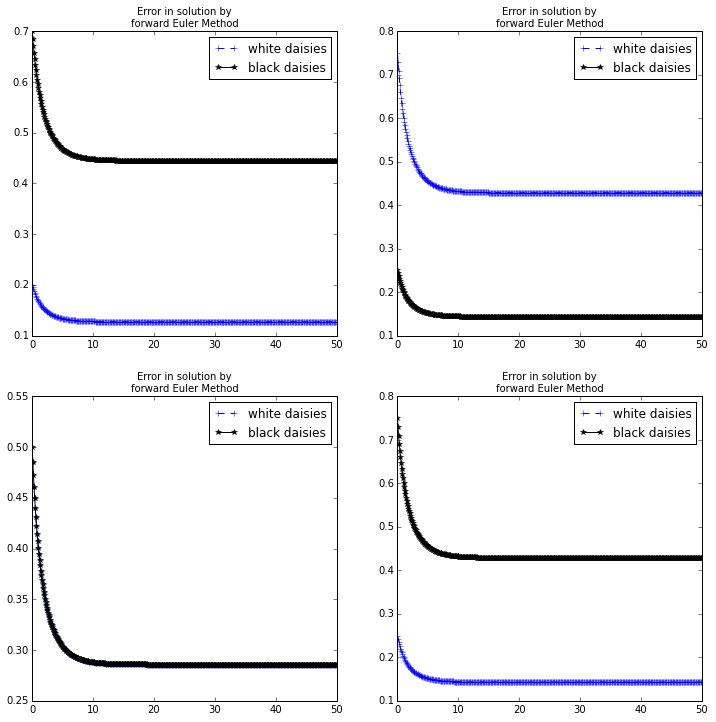

In [7]:
# integrate constant growth rates with fixed timesteps
#
%matplotlib inline
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class Integ51(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        print("whiteconc")
        print(self.initvars.whiteconc)
        print("blackconc")
        print(self.initvars.blackconc)
        self.nvars = len(self.yinit)
        return None
    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.7  # growth rate for black daisies
        beta_w = 0.7  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
 
        return f
    
    

theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

file_list = ['fixed_growth.yaml','fixed_growth2.yaml','fixed_growth3.yaml','fixed_growth4.yaml']
print(file_list[0])


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    
for i in range(1,5):
        
    ax = fig.add_subplot(2,2,i)
  

    theSolver = Integ51(file_list[i-1])
    timeVals, yVals, errorList = theSolver.timeloop5fixed()

    theLines = ax.plot(timeVals, yVals)  
    theLines[0].set_marker('+')
    theLines[0].set_linestyle('--')
    theLines[1].set_color('k')
    theLines[1].set_marker('*')
    
    
    ax.legend(theLines, ('white daisies', 'black daisies'), loc='best')
    #ax.plot(timeVals[1], yVals[1])
    titl = "Error in solution by \nforward Euler Method"
#     theLines = ax.plot(timeVals, yVals)
#     ax.set_title(titl, fontsize = 10)
#     theLines[0].set_marker('+')
#     theLines[1].set_linestyle('--')
#     theLines[1].set_color('k')
#     theLines[1].set_marker('*')
#     theAx.set_title('lab 5 interactive 1  constant growth rate')
#     theAx.set_xlabel('time')
#     theAx.set_ylabel('fractional coverage')
#     theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

#     thefig, theAx = plt.subplots(2,2,i)
    
    ax.hold(True)
    ax.set_title(titl, fontsize = 10)
#     ax.legend(loc=2,prop={'size':6})
#     if (i == 2):
#         ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()
    
    
# for i in range(0,3):
  
#     ax = fig.add_subplot(2,2,i)
#     if i == 1:
#         theSolver = Integ51(file_list[i])
#         timeVals, yVals, errorList = theSolver.timeloop5fixed()
#         ax.plot(timeVals, yVals)
#         titl = "Error in solution by \nforward Euler Method"
#         ax.set_title(titl, fontsize = 10)
##     ax = fig.add_subplot(2,2,i)
#     ax.plot(timeVals, yVals)
#     titl = "Error in solution by \nforward Euler Method"
#     ax.set_title(titl, fontsize = 10)    
    

#     elif i == 2:
#         theSolver = Integ51('fixed_growth.yaml')
#         timeVals, yVals, errorList = theSolver.timeloop5fixed()
#         ax.plot(timeVals, yVals)
#         titl = "Error in solution by \nforward Euler Method"
#         ax.set_title(titl, fontsize = 10)
#     elif i == 3:
        
#         theSolver = Integ51('fixed_growth.yaml')
#         timeVals, yVals, errorList = theSolver.timeloop5fixed()
#         ax.plot(timeVals, yVals)
#         titl = "Error in solution by \nforward Euler Method"
#         ax.set_title(titl, fontsize = 10)
        
#     elif i == 4:
#         theSolver = Integ51('fixed_growth.yaml')
#         timeVals, yVals, errorList = theSolver.timeloop5fixed()
#         ax.plot(timeVals, yVals)
#         titl = "Error in solution by \nforward Euler Method"
#         ax.set_title(titl, fontsize = 10)

        
#     ax.hold(True)
#     ax.set_title(titl, fontsize = 10)
#     ax.legend(loc=2,prop={'size':6})
# #     if (i == 2):
# #         ax.set_ylim((-100,40))

# fig.set_facecolor('w')
# plt.show()